In [327]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV

In [328]:
dfa = pd.read_csv("parta.csv")

In [329]:
dfa.head()

,age,education,housing,loan,contact,duration,campaign,pdays,previous,y,...,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,default_no,default_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success
0,40.149846,1,0,0,1,105.0,1,1,0,no,...,0,0,1,0,0,0,1,0,1,0
1,36.000000,2,1,1,1,125.0,5,1,0,no,...,0,0,1,0,0,1,0,0,1,0
2,40.149846,4,0,0,0,111.0,1,1,0,no,...,0,0,0,1,0,1,0,0,1,0
3,39.000000,2,0,1,1,173.0,2,1,0,no,...,0,0,1,0,0,0,1,0,1,0
4,41.000000,1,0,1,1,107.0,1,1,0,no,...,0,0,1,0,0,0,1,0,1,0


In [330]:
dfb = pd.read_csv("partb.csv")

## PART B

In [331]:
# Reg - Part b

In [352]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = dfb.drop(['Salary'], axis=1)
y = dfb['Salary']

X_train_sal, X_test_sal, y_train, y_test = train_test_split(X, y, random_state = 0)

In [353]:
scaler = StandardScaler()

In [354]:
X_train = scaler.fit_transform(X_train_sal)
X_test = scaler.transform(X_test_sal)

In [355]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

### Q15 - Create a bagging ensemble with DecisionTreeRegressor with max_depth = 3 as a base model. Use a GridSearchCV with cv = 5 to train the bagging regressor with the following grid parameters:

- 'max_features': [0.1, 0.2, 0.5, 1]
- 'n_estimators':[100, 200, 300, 500]
- 'max_samples':[0.1, 0.5, 1]. 

Use this model to answer the next 3 questions. What is the best value of hyperparameter max_features?

In [334]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

param_grid = {'max_features':[0.1, 0.2, 0.5, 1],
              'n_estimators':[100, 200, 300, 500],
              'max_samples':[0.1, 0.5, 1]}

bag_clf = BaggingRegressor(DecisionTreeRegressor(max_depth = 3, random_state = 0), random_state=0)
bag_grid = GridSearchCV(bag_clf, param_grid = param_grid, cv = 5, n_jobs = -1)
bag_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=3,
                                                                             random_state=0),
                                        random_state=0),
             n_jobs=-1,
             param_grid={'max_features': [0.1, 0.2, 0.5, 1],
                         'max_samples': [0.1, 0.5, 1],
                         'n_estimators': [100, 200, 300, 500]})

In [335]:
bag_grid.best_params_

{'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 200}

In [336]:
bag_grida = bag_grid.best_score_

In [337]:
print(bag_grida)

0.13196276612647867


### Q16 - As you have learned in class, the RandomForest model is a Bagging ensemble with random subspace and random patching. For this and the next two questions, use a GridSearchCV model to find the best hyperparameters listed in the previous question, and a new hyperparameter 'max_depth': [1, 3, 5, 7]. Which of the following hyperparameters have the best value different from the Bagging Classifier in the previous question? 

In [339]:
param_grid = {'max_features':[0.1, 0.2, 0.5, 1],
              'n_estimators':[100, 200, 300, 500],
              'max_samples':[0.1, 0.5, 1],
              'max_depth':[1, 3, 5, 7] }

In [341]:
from sklearn.ensemble import RandomForestRegressor
gscv_dtr = GridSearchCV(RandomForestRegressor(random_state=0), cv=5, n_jobs=-1, param_grid = param_grid)
gscv_dtr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7],
                         'max_features': [0.1, 0.2, 0.5, 1],
                         'max_samples': [0.1, 0.5, 1],
                         'n_estimators': [100, 200, 300, 500]})

In [222]:
gscv_dtr.best_params_

{'max_depth': 7, 'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 200}

In [223]:
baggrid_b = gscv_dtr.best_score_

In [224]:
print(baggrid_b)

0.21143716396987347


### Q18 - Best average validation score considering the model in the prev two questions

In [333]:
print('Best average valid score: %.4f'%((bag_grida + baggrid_b)/2))

Best average valid score: 0.1717


### Q19 - Build and fit a RandomForestRegressor model with the best hyperparameters found in the previous question and random_state = 0. What is the top three most important feature based on this model?

In [125]:
from sklearn.ensemble import RandomForestRegressor

In [351]:
rfr = RandomForestRegressor(max_features = 0.5, max_samples=0.5, n_estimators=200, random_state=0)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, max_samples=0.5, n_estimators=200,
                      random_state=0)

In [352]:
df_wcolumns = dfb.drop('Salary', axis=1)

([<matplotlib.axis.YTick at 0x11f9fb400>,
 [Text(0, 0, 'Termd'),
  Text(0, 1, 'Gender'),
  Text(0, 2, 'PerformanceScore'),
  Text(0, 3, 'EngagementSurvey'),
  Text(0, 4, 'EmpSatisfaction'),
  Text(0, 5, 'SpecialProjectsCount'),
  Text(0, 6, 'DaysLateLast30'),
  Text(0, 7, 'Absences'),
  Text(0, 8, 'Years of Tenure'),
  Text(0, 9, 'Age'),
  Text(0, 10, 'EmpStatusID_1'),
  Text(0, 11, 'EmpStatusID_2'),
  Text(0, 12, 'EmpStatusID_3'),
  Text(0, 13, 'EmpStatusID_4'),
  Text(0, 14, 'EmpStatusID_5'),
  Text(0, 15, 'Divorced'),
  Text(0, 16, 'Married'),
  Text(0, 17, 'Separated'),
  Text(0, 18, 'Single'),
  Text(0, 19, 'Widowed'),
  Text(0, 20, 'Eligible NonCitizen'),
  Text(0, 21, 'Non-Citizen'),
  Text(0, 22, 'US Citizen')])

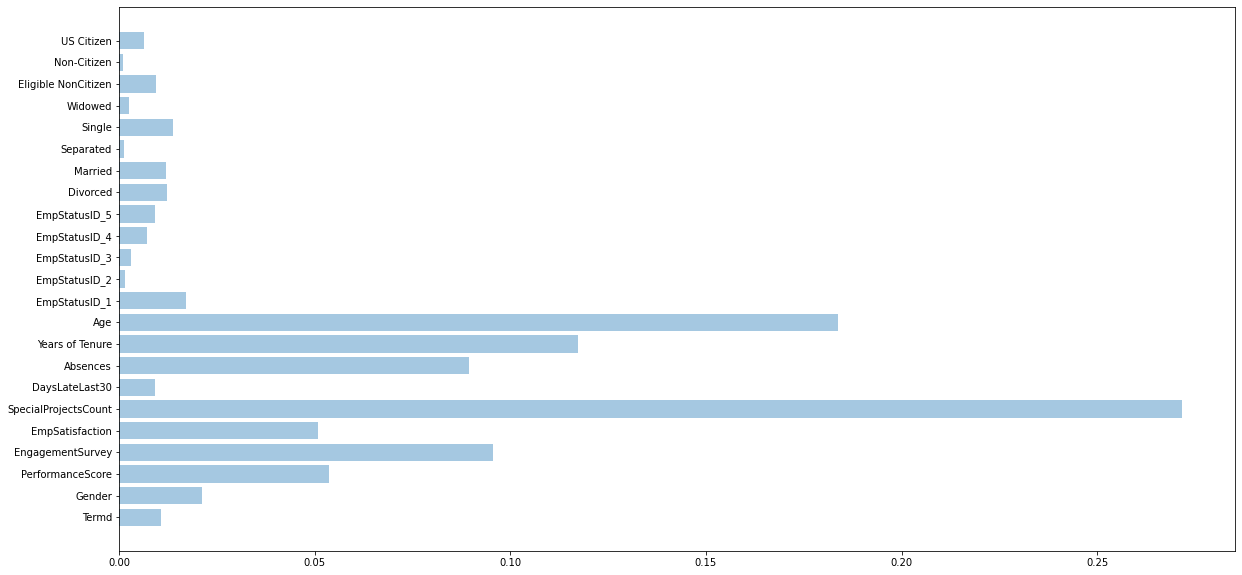

In [353]:
%matplotlib inline

plt.subplots(figsize = (20,10))
y_list = rfr.feature_importances_
y_pos = np.arange(len(y_list))
features = df_wcolumns.columns
plt.barh(y_pos, y_list, align='center', alpha=0.4)
plt.yticks(y_pos, features)

### Q20 - Use a GridSearchCV to find the best hyperparameters of an AdaBoostRegressor. The goal is to find the best value of hyperparameters n_estimators and learning_rate. Which of the following is showing the best parameters of the grid search model? (Please check the sklearn website to learn about the default base model)

In [133]:
from sklearn.ensemble import AdaBoostRegressor

In [134]:
param_grid = {'learning_rate':[0.001, 0.01, 0.1, 1],
              'n_estimators':[100, 200, 500, 1000]
             }

In [135]:
ada_rgr = AdaBoostRegressor(random_state=0)

grid_ada = GridSearchCV(ada_rgr, param_grid, cv = 5)
grid_ada.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=0),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'n_estimators': [100, 200, 500, 1000]})

In [136]:
grid_ada.best_params_

{'learning_rate': 0.01, 'n_estimators': 100}

In [141]:
print('Best valid score: %.4f'%grid_ada.best_score_)

Best valid score: 0.3062


### Q22 - Use a GridSearchCV model to find the best hyperparameters of a GradientBoostingRegressor model. You can use 'max_depth':[1, 2, 5], 'n_estimators':[200, 500, 1000], 'learning_rate':[0.001, 0.01, 0.1] for the param_grid. Which list shows the best hyperparameters of the model?

In [144]:
from sklearn.ensemble import GradientBoostingRegressor

In [142]:
param_grid = {'max_depth':[1, 2, 5],
              'n_estimators':[200, 500, 1000],
              'learning_rate':[0.001, 0.01, 0.1]
             }

In [146]:
gbrt = GridSearchCV(GradientBoostingRegressor(random_state=0), param_grid, cv = 5)
gbrt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=0),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [1, 2, 5],
                         'n_estimators': [200, 500, 1000]})

In [147]:
gbrt.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}

In [148]:
print('Best valid score: %.4f'%gbrt.best_score_)

Best valid score: 0.2179


### Q24  - Build and fit a GradientBoostingRegressor model with the best hyperparameters found in the last two questions and random_state = 0. What are the top three most important features based on this model?

In [149]:
grbr = GradientBoostingRegressor(random_state=0, learning_rate=0.01, max_depth=5, n_estimators=200)
grbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, n_estimators=200,
                          random_state=0)

([<matplotlib.axis.YTick at 0x11f3e9ee0>,
 [Text(0, 0, 'Termd'),
  Text(0, 1, 'Gender'),
  Text(0, 2, 'PerformanceScore'),
  Text(0, 3, 'EngagementSurvey'),
  Text(0, 4, 'EmpSatisfaction'),
  Text(0, 5, 'SpecialProjectsCount'),
  Text(0, 6, 'DaysLateLast30'),
  Text(0, 7, 'Absences'),
  Text(0, 8, 'Years of Tenure'),
  Text(0, 9, 'Age'),
  Text(0, 10, 'EmpStatusID_1'),
  Text(0, 11, 'EmpStatusID_2'),
  Text(0, 12, 'EmpStatusID_3'),
  Text(0, 13, 'EmpStatusID_4'),
  Text(0, 14, 'EmpStatusID_5'),
  Text(0, 15, 'Divorced'),
  Text(0, 16, 'Married'),
  Text(0, 17, 'Separated'),
  Text(0, 18, 'Single'),
  Text(0, 19, 'Widowed'),
  Text(0, 20, 'Eligible NonCitizen'),
  Text(0, 21, 'Non-Citizen'),
  Text(0, 22, 'US Citizen')])

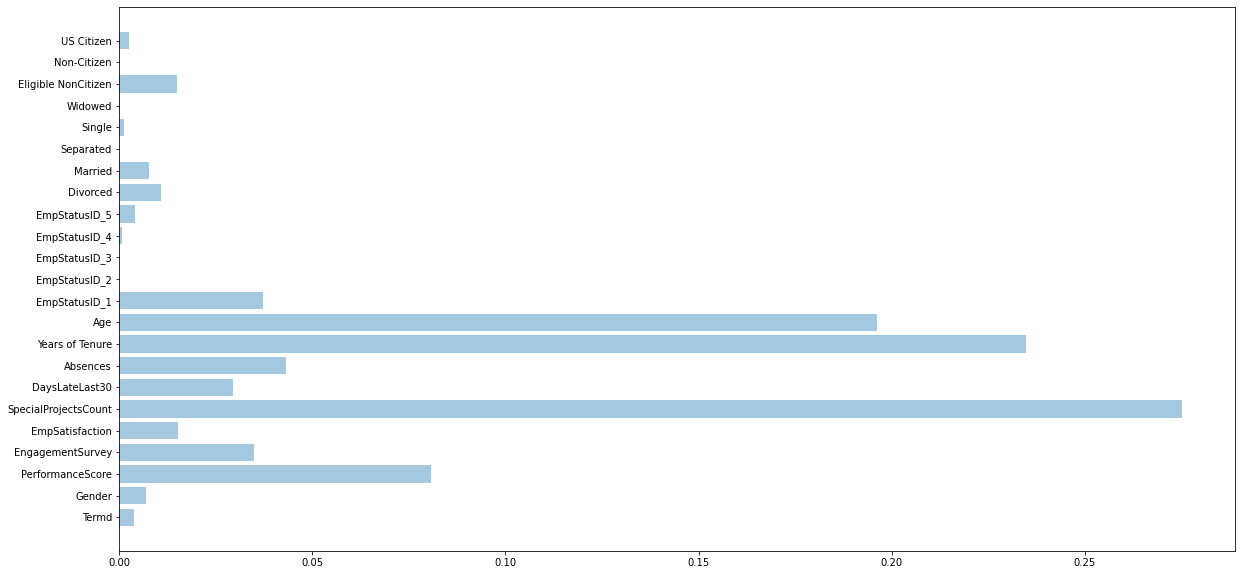

In [150]:
%matplotlib inline

plt.subplots(figsize = (20,10))
y_list = grbr.feature_importances_
y_pos = np.arange(len(y_list))
features = df_wcolumns.columns
plt.barh(y_pos, y_list, align='center', alpha=0.4)
plt.yticks(y_pos, features)

## Lab 7

In [ ]:
# Q8 - Use PCA to reduce the feature space's size while retaining 95% of explained variance. 
# What is the size of the transformed feature space? (Number of features in the reduced dataset) 

In [356]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95, random_state=0)
pca.fit(X_train)

PCA(n_components=0.95, random_state=0)

In [337]:
pca.explained_variance_ratio_.sum()

0.9616681878810729

In [357]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [359]:
X_train_pca.shape

(233, 16)

In [280]:
X_test_pca[1].shape

(16,)

In [255]:
X_test[1].shape

(23,)

In [253]:
X_train[1].shape

(23,)

In [209]:
X_train_pca[:1,]

array([[ 1.9960102 , -1.66800884, -1.18312746,  1.08444404, -1.01853537,
        -0.00604185, -0.50993431,  1.01464068, -2.82343088, -0.11561405,
        -0.1341953 ,  0.23430767,  0.17013975,  0.59592327,  0.30508856,
        -0.53533541]])

In [196]:
print('%.4f'%X_test_pca[:, 0].mean())

-0.0000


In [197]:
X_test_pca

array([[ 0.02581841,  2.16865475,  0.66941553, ..., -0.42205482,
         0.26436162, -0.79953724],
       [-0.20418916,  2.34487745, -0.72656179, ..., -1.69860504,
        -0.98215388, -0.12520356],
       [-0.42801386, -0.98315857,  0.3305903 , ...,  1.25526764,
        -0.04386027,  0.4770791 ],
       ...,
       [-1.32539842, -0.38916661, -0.70207262, ...,  0.63680718,
         1.16184685,  0.14919121],
       [ 0.36665133,  2.38294944,  0.20786474, ..., -0.21000907,
        -0.3700287 , -1.23155266],
       [-0.72198622, -0.89873842, -0.96086591, ..., -0.6238211 ,
        -0.72363317, -0.20329213]])

In [ ]:
# Q9 - GradientBoostingRegressor

In [339]:
from sklearn.ensemble import GradientBoostingRegressor

In [387]:
param_grid = {'max_depth':[1, 2, 5],
              'n_estimators':[200, 500, 1000],
              'learning_rate':[0.001, 0.01, 0.1]
             }

In [389]:
grb_pca = GridSearchCV(GradientBoostingRegressor(random_state=0), param_grid)

In [390]:
grb_pca.fit(X_train_pca, y_train)

GridSearchCV(estimator=GradientBoostingRegressor(random_state=0),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [1, 2, 5],
                         'n_estimators': [200, 500, 1000]})

In [391]:
grb_pca.best_params_

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 200}

In [392]:
print('Best valid score: %.4f'%grb_pca.best_score_)

Best valid score: 0.0952


In [393]:
grb_pca.score(X_test_pca, y_test)

-0.15940824335780124

In [368]:
print('Test accuracy: %.4f' % grb_pca.score(X_test_pca, y_test))

Test accuracy: -0.1594


In [398]:
gbr = GradientBoostingRegressor(random_state=0, learning_rate=0.1, max_depth=1, n_estimators=200)

In [399]:
gbr.fit(X_train_pca,y_train)
gbr.score(X_test_pca, y_test)

-0.15940824335780124

In [218]:
gbr = GradientBoostingRegressor(random_state=0, learning_rate=0.1, max_depth=1, n_estimators=200)
gbr.fit(X_train_pca, y_train)

GradientBoostingRegressor(max_depth=1, n_estimators=200, random_state=0)

In [275]:
gbr.score(X_test_pca, y_test)

-0.15940824335780124

In [ ]:
# gbrt = GradientBoostingRegressor(learning_rate= 0.1, max_depth= 1, n_estimators= 200, random_state=0)
# gbrt.fit(X_train_pca, y_train)
# gbrt.score(X_test_pca, y_test)

In [ ]:
# Q11 - Decision Tree Regressor

In [400]:
from sklearn.tree import DecisionTreeRegressor

In [401]:
param_grid = {'max_depth': [1,2,5,10], 'random_state': [0]}

In [409]:
dtr = DecisionTreeRegressor(random_state=0)

In [410]:
gs_dtr = GridSearchCV(dtr, param_grid, cv = 5)

In [411]:
gs_dtr.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 5, 10], 'random_state': [0]})

In [412]:
gs_dtr.best_params_

{'max_depth': 2, 'random_state': 0}

In [413]:
print('Best valid score: %.4f'%gs_dtr.best_score_)

Best valid score: -0.1568
